
A few useful articles:<br>
[An introduction to the analysis of shotgun metagenomic data](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4059276/)<br>
[Shotgun metagenomics, from sampling to analysis](https://pubmed.ncbi.nlm.nih.gov/28898207/)<br>
[16S rRNA Gene Sequencing for Bacterial Identification in the Diagnostic Laboratory: Pluses, Perils, and Pitfalls](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2045242/)<br>
[Then and now: use of 16S rDNA gene sequencing for bacterial identification and discovery of novel bacteria in clinical microbiology laboratories](https://pubmed.ncbi.nlm.nih.gov/18828852/)<br>
[Direct 16S rRNA-seq from bacterial communities: a PCR-independent approach to simultaneously assess microbial diversity and functional activity potential of each taxon](https://www.nature.com/articles/srep32165#abstract)<br>


Loading libraries

In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))




/kaggle/input/metagenomics/markers2clades_DB.txt
/kaggle/input/metagenomics/abundance_stoolsubset.txt
/kaggle/input/metagenomics/abundance.txt
/kaggle/input/metagenomics/marker_presence.txt
/kaggle/input/human-metagenomics/markers2clades_DB.csv
/kaggle/input/human-metagenomics/abundance.csv
/kaggle/input/human-metagenomics/marker_presence.csv
/kaggle/input/human-metagenomics/abundance_stoolsubset.csv


In [24]:
df = pd.read_csv("/kaggle/input/human-metagenomics/abundance_stoolsubset.csv")
df.head(5)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country,sequencing_technology,pubmedid,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965
0,Candela_Africa,H10,h10,stool,n,40,female,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Candela_Africa,H11,h11,stool,n,29,female,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Candela_Africa,H12,h12,stool,n,8,female,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Candela_Africa,H13,h13,stool,n,34,male,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Candela_Africa,H14,h14,stool,n,30,male,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df.columns

Index(['dataset_name', 'sampleID', 'subjectID', 'bodysite', 'disease', 'age',
       'gender', 'country', 'sequencing_technology', 'pubmedid',
       ...
       'k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified',
       'k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis',
       'k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925',
       'k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae',
       'k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum',
       'k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis',
       'k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g

In [26]:
df.bodysite.unique()

array(['stool'], dtype=object)

In [27]:
valid_column = [col for col in df.columns  if ("s__" in col and  "t__" not in col )  or  col == "disease" ]

In [28]:
df = df[valid_column]

In [29]:
df.shape

(1989, 827)

In [30]:
df.head(2)

,disease,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_turicensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Varibaculum|s__Varibaculum_cambriense,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_mucilaginosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_unclassified,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Lysinibacillus|s__Lysinibacillus_fusiformis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Lysinibacillus|s__Lysinibacillus_sphaericus,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobacterium|s__Methanobacterium_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Lysinibacillus|s__Lysinibacillus_boronitolerans,k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Staphylococcaceae|g__Staphylococcus|s__Staphylococcus_vitulinus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Bavariicoccus|s__Bavariicoccus_seileri,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1
0,n,0.24169,0.0,0.0,0.0,0.0,0.0,0.0,0.26992,0.00004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,n,0.50621,0.0,0.0,0.0,0.0,0.0,0.0,0.09916,0.00258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df.drop(columns=["disease"]).sum(axis=1).head(10)


0     99.99607
1    100.00003
2    100.00001
3     99.99998
4     99.99383
5     99.99998
6     99.99310
7     99.96256
8     99.99140
9     99.99996
dtype: float64

In [32]:
df.disease.value_counts()

n                             944
t2d                           223
obesity                       164
ibd_ulcerative_colitis        148
cirrhosis                     118
leaness                        89
stec2-positive                 52
impaired_glucose_tolerance     49
cancer                         48
n_relative                     47
small_adenoma                  26
ibd_crohn_disease              25
 -                             20
large_adenoma                  13
overweight                     10
-                               7
obese                           5
underweight                     1
Name: disease, dtype: int64

In [33]:
top_diseases = ["n", 't2d',"obesity", "cirrhosis","ibd_ulcerative_colitis", "cancer"]
df = df[df['disease'].isin(top_diseases)]
df.shape

(1645, 827)

In [34]:
X = df.drop(columns = "disease")
Y = df['disease']
X /= 100

In [35]:
# let ua try some metrics to indicates the richness and diversity within each patient
H = -(X * np.log(X + 1e-9)).sum(axis = 1)
richness = (X > 0).sum(axis=1)

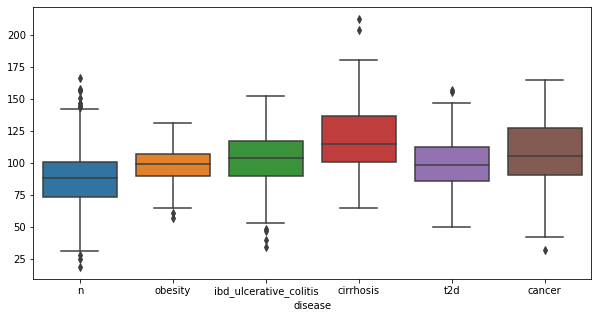

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(Y, richness)


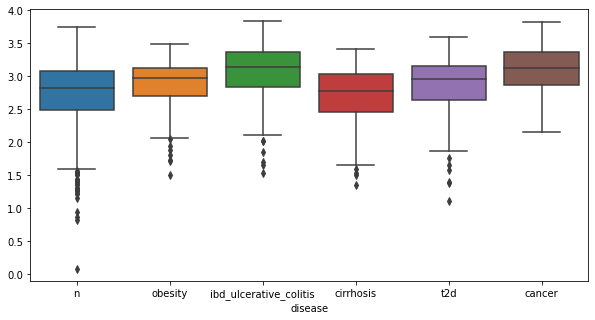

In [37]:
plt.figure(figsize=(10,5))
sns.boxplot(Y, H)


In [38]:
labels = {"n" : 0, 't2d': 1,"obesity" : 2, "cirrhosis" : 3,"ibd_ulcerative_colitis" : 4, "cancer" : 5}
Y.replace(labels, inplace = True)
Y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: disease, dtype: int64

In [39]:
Y.value_counts()

0    944
1    223
2    164
4    148
3    118
5     48
Name: disease, dtype: int64

In [40]:
import pandas as pd

# Suppose your dataset is:
# X: features, Y: labels
df = X.copy()
df['label'] = Y

# Separate majority and minority classes
df_majority = df[df['label'] == 0]
df_minority = df[df['label'] != 0]

# Undersample majority class
n_samples = len(df_minority)  # optional: use len of smallest class or sum of all minority
df_majority_downsampled = df_majority.sample(n=n_samples//2, random_state=42)

# Combine minority classes and downsampled majority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate features and labels again
X = df_balanced.drop('label', axis=1)
Y = df_balanced['label']


In [41]:
Y.value_counts()

0    350
1    223
2    164
4    148
3    118
5     48
Name: label, dtype: int64

In [42]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_sample_weight
import xgboost as xgb

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=42,
    stratify=Y
)

# 2. Compute sample weights for class imbalance
sample_weights = compute_sample_weight(class_weight='balanced', y=Y_train)

# 3. Initialize XGBoost classifier
model = xgb.XGBClassifier(
    objective='multi:softprob',      
    num_class=len(np.unique(Y)),    
    eval_metric='mlogloss'          
)

# 4. Train the model with sample weights
model.fit(X_train, Y_train, sample_weight=sample_weights)

# 5. Make predictions
Y_pred = model.predict(X_test)

# 6. Evaluate the model
# Accuracy
acc = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {acc:.4f}\n")

# Classification report
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))


Accuracy: 0.7536

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.64      0.68        70
           1       0.70      0.82      0.76        45
           2       0.80      0.73      0.76        33
           3       0.89      1.00      0.94        24
           4       0.79      0.87      0.83        30
           5       0.50      0.33      0.40         9

    accuracy                           0.75       211
   macro avg       0.73      0.73      0.73       211
weighted avg       0.75      0.75      0.75       211

Confusion Matrix:
[[45 13  4  1  4  3]
 [ 5 37  0  2  1  0]
 [ 6  2 24  0  1  0]
 [ 0  0  0 24  0  0]
 [ 2  0  2  0 26  0]
 [ 4  1  0  0  1  3]]


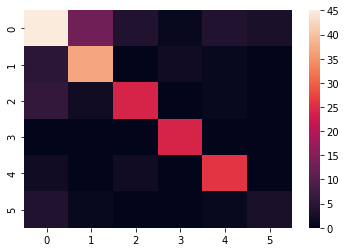

In [43]:
sns.heatmap(confusion_matrix(Y_test, Y_pred))

In [44]:
import joblib
joblib.dump(model, "xgb_model.pkl")


['xgb_model.pkl']